# Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Loading the dataset

In [4]:
df = pd.read_parquet('/content/drive/MyDrive/train.parquet')

# To analyze the dropoff rate for “Target Drug”,

In [5]:
# Convert dates to months
df['Month'] = df['Date'].dt.to_period('M')

# Group patients by month of drop-off
dropoff_counts = df[df['Incident'] == 'TARGET DRUG'].groupby('Month')['Patient-Uid'].nunique()

In [6]:
# Define a function to extract events before drop-off for a patient
def get_events_before_dropoff(patient_uid, dropoff_month):
    patient_data = df[(df['Patient-Uid'] == patient_uid) & (df['Month'] == dropoff_month)]
    return patient_data[patient_data['Date'] < patient_data[patient_data['Incident'] == 'TARGET DRUG']['Date'].min()]

In [10]:
# Calculate dropoff rate by month

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
dropoff_rates = df.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)

In [11]:
# To analyze events driving dropp-off

target_data = df[df['Incident'] == 'TARGET DRUG']

dropoff_reasons = df[df['Patient-Uid'].isin(target_data['Patient-Uid'])]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Date'] < dropoff_reasons.groupby('Patient-Uid')['Date'].transform('max')]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Incident'] != 'TARGET DRUG']

# Data Visualization

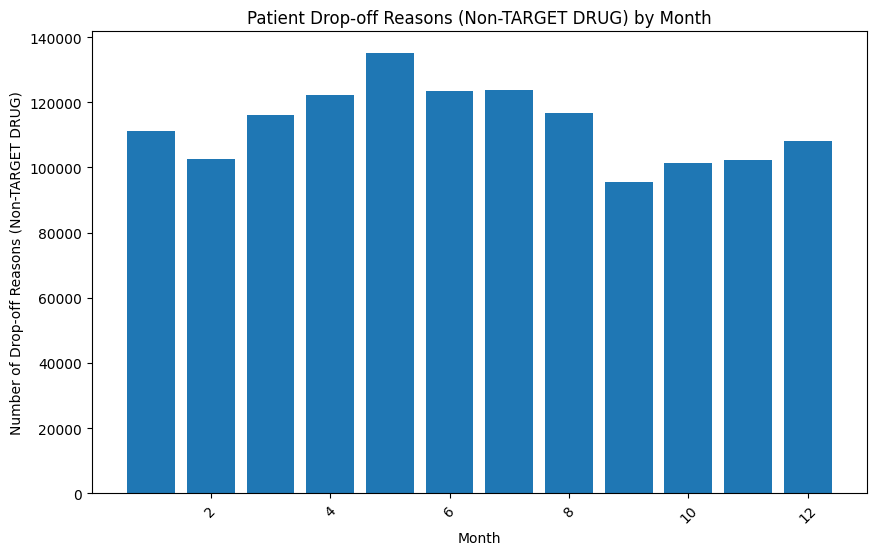

In [12]:
# Group the data by month and count the number of non-"TARGET DRUG" incidents
dropoff_reason_counts = dropoff_reasons[dropoff_reasons['Incident'] != 'TARGET DRUG'].groupby('Month')['Patient-Uid'].count()

# Create a bar plot to visualize the reasons for drop-off by month
plt.figure(figsize=(10, 6))
plt.bar(dropoff_reason_counts.index, dropoff_reason_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Drop-off Reasons (Non-TARGET DRUG)')
plt.title('Patient Drop-off Reasons (Non-TARGET DRUG) by Month')
plt.xticks(rotation=45)
plt.show()


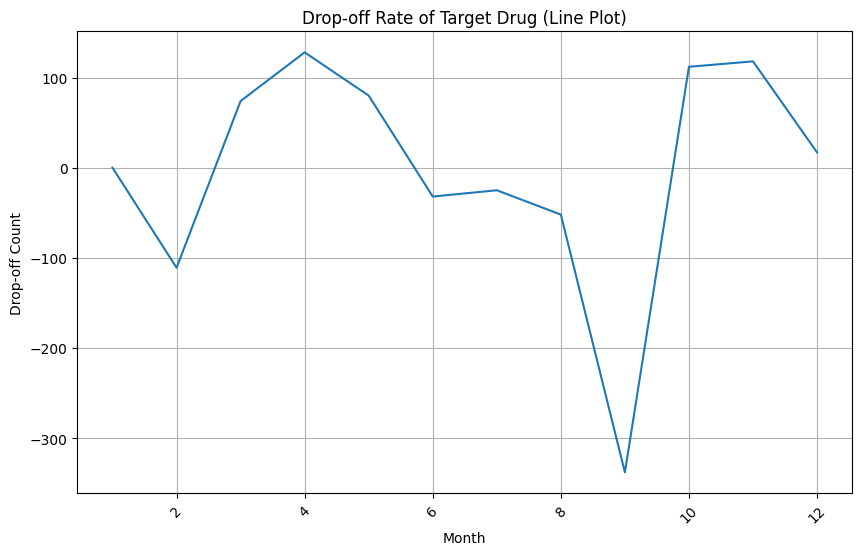

In [19]:
plt.figure(figsize=(10, 6))
dropoff_rates.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Drop-off Count')
plt.title('Drop-off Rate of Target Drug (Line Plot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



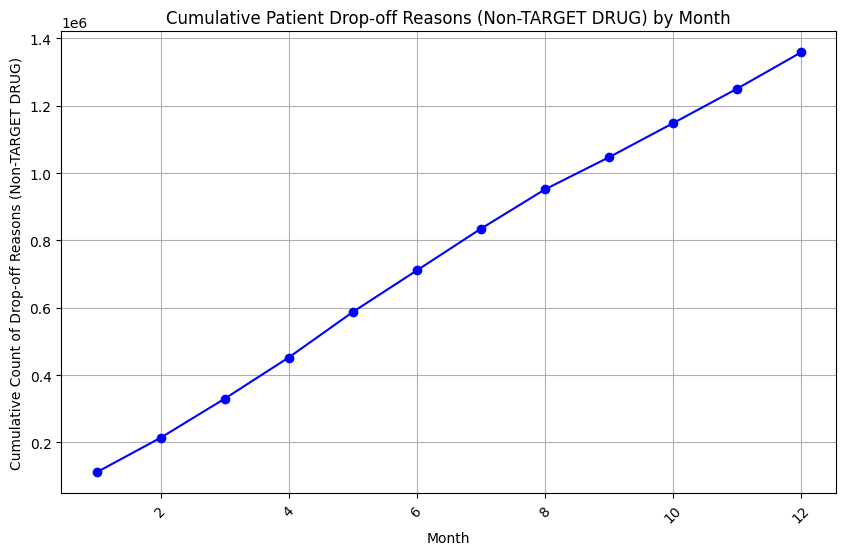

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the `dropoff_reasons` DataFrame

# Group the data by month and count the cumulative number of non-"TARGET DRUG" incidents
dropoff_reason_counts = dropoff_reasons[dropoff_reasons['Incident'] != 'TARGET DRUG'].groupby('Month')['Patient-Uid'].count()
cumulative_counts = dropoff_reason_counts.cumsum()

# Create a line plot to visualize the cumulative reasons for drop-off by month
plt.figure(figsize=(10, 6))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Cumulative Count of Drop-off Reasons (Non-TARGET DRUG)')
plt.title('Cumulative Patient Drop-off Reasons (Non-TARGET DRUG) by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
